# UNDERSTANDING DATA

In [655]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import folium
import folium.plugins
from sklearn import preprocessing
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt 
data = pd.read_excel("C:/Users/LENOVO/Data_Nilai_Pegawai.xlsx") 

In [656]:
data.head()

,ID PERSON,Tingkat Pendidikan Akhir,Usia,Satuan Kerja,Bulan,Nilai
0,1001,S3,61,DINAS B,Juli,7.88436
1,1002,SLTA,59,DINAS A,Juli,6.95183
2,1003,S2,57,BADAN D,Juli,8.18452
3,1004,SD,56,DINAS B,Juli,6.55612
4,1005,D3,54,DINAS B,Juli,6.34694


In [657]:
data.shape

(30, 6)

In [658]:
data.dtypes

ID PERSON                     int64
Tingkat Pendidikan Akhir     object
Usia                          int64
Satuan Kerja                 object
Bulan                        object
Nilai                       float64
dtype: object

In [659]:
#untuk mengetahui banyaknya data yang tidak terisi(missing value) pada features dan %nya terhadap total data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], 
                         sort=False).sort_values('Total', ascending=False)
missing_data.head(16)

,Total,Percent
Nilai,0,0.0
Bulan,0,0.0
Satuan Kerja,0,0.0
Usia,0,0.0
Tingkat Pendidikan Akhir,0,0.0
ID PERSON,0,0.0


In [660]:
data.describe()

,ID PERSON,Usia,Nilai
count,30.000000,30.000000,30.000000
mean,1015.500000,40.233333,7.185791
std,8.803408,10.753294,0.484566
min,1001.000000,25.000000,6.346940
25%,1008.250000,32.500000,6.964457
50%,1015.500000,41.000000,7.179420
75%,1022.750000,47.000000,7.452400
max,1030.000000,61.000000,8.403630


# PREPROCESSING DATA

In [661]:
data.rename(
  columns={
    'ID PERSON':'ID',
    'Tingkat Pendidikan Akhir' : 'TPA',
    'Satuan Kerja' : 'SK'
  },
  inplace=True
)
data.head()


,ID,TPA,Usia,SK,Bulan,Nilai
0,1001,S3,61,DINAS B,Juli,7.88436
1,1002,SLTA,59,DINAS A,Juli,6.95183
2,1003,S2,57,BADAN D,Juli,8.18452
3,1004,SD,56,DINAS B,Juli,6.55612
4,1005,D3,54,DINAS B,Juli,6.34694


[Text(0, 0.5, 'Jumlah'), Text(0.5, 0, 'Tingkat Pendidikan Akhir')]

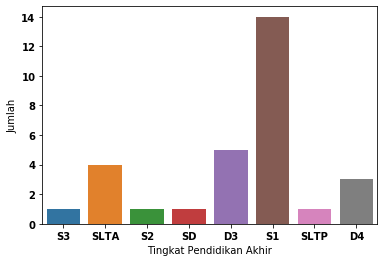

In [662]:
import seaborn as sns
sns.countplot(data['TPA']).set(xlabel='Tingkat Pendidikan Akhir', ylabel='Jumlah')


In [663]:
#data = data.groupby(['TPA'])['Nilai'].mean()
#data.plot.bar()
#plt.xlabel("Tingkat Pendidikan Akhir")
#plt.ylabel('Nilai')

In [664]:
#data = data.groupby(['SK'])['Nilai'].mean()
#data.plot.bar()
#plt.xlabel("Satuan Kerja")
#plt.ylabel('Nilai')

Text(0, 0.5, 'Nilai')

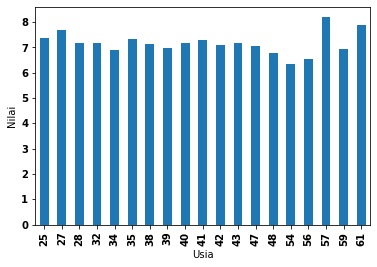

In [665]:
data = data.groupby(['Usia'])['Nilai'].mean()
data.plot.bar()
plt.xlabel("Usia")
plt.ylabel('Nilai')

In [629]:
SK ={'DINAS A':1, 'DINAS B':2, 'DINAS F':3, 
    'DINAS P':4, 'BADAN B':5, 
    'BADAN D':6 }
data['SK'] = data.SK.map(SK)
data.dtypes
data.head()

,ID,TPA,Usia,SK,Bulan,Nilai
0,1001,S3,61,2,Juli,7.88436
1,1002,SLTA,59,1,Juli,6.95183
2,1003,S2,57,6,Juli,8.18452
3,1004,SD,56,2,Juli,6.55612
4,1005,D3,54,2,Juli,6.34694


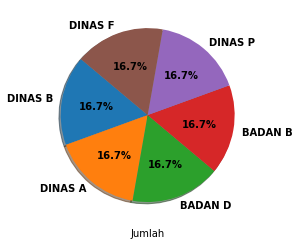

In [630]:
import pandas as pd
import matplotlib.pyplot as plt 

product_data = ['DINAS B','DINAS A','BADAN D','BADAN B','DINAS P','DINAS F']   
bug_data = [5,5,5,5,5,5]                

plt.pie(bug_data , labels=product_data , autopct='%1.1f%%', shadow=True, startangle=140)
plt.xlabel('Jumlah')

plt.show()

In [631]:
TPA ={'SD':1, 'SLTP':2, 'SLTA':3, 
    'D3':4, 'D4':5, 
    'S1':6, 'S2':7, 'S3':8}
data['TPA'] = data.TPA.map(TPA)
data.dtypes

ID         int64
TPA        int64
Usia       int64
SK         int64
Bulan     object
Nilai    float64
dtype: object

In [632]:
data.head()
data.describe()

,ID,TPA,Usia,SK,Nilai
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1015.500000,4.966667,40.233333,3.500000,7.185791
std,8.803408,1.586219,10.753294,1.737021,0.484566
min,1001.000000,1.000000,25.000000,1.000000,6.346940
25%,1008.250000,4.000000,32.500000,2.000000,6.964457
50%,1015.500000,6.000000,41.000000,3.500000,7.179420
75%,1022.750000,6.000000,47.000000,5.000000,7.452400
max,1030.000000,8.000000,61.000000,6.000000,8.403630


In [633]:
#untuk mengetahui korelasi antar feature
data.corr().style.background_gradient(cmap='coolwarm')

,ID,TPA,Usia,SK,Nilai
ID,1,0.33707,-0.978945,0.285257,0.146537
TPA,0.33707,1,-0.29064,0.256559,0.5143
Usia,-0.978945,-0.29064,1,-0.277838,-0.127943
SK,0.285257,0.256559,-0.277838,1,0.177729
Nilai,0.146537,0.5143,-0.127943,0.177729,1


In [634]:
#ada korelasi tingkat pendidikan akhir dan nilai kompetensi pegawai

In [635]:
data.describe()

,ID,TPA,Usia,SK,Nilai
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1015.500000,4.966667,40.233333,3.500000,7.185791
std,8.803408,1.586219,10.753294,1.737021,0.484566
min,1001.000000,1.000000,25.000000,1.000000,6.346940
25%,1008.250000,4.000000,32.500000,2.000000,6.964457
50%,1015.500000,6.000000,41.000000,3.500000,7.179420
75%,1022.750000,6.000000,47.000000,5.000000,7.452400
max,1030.000000,8.000000,61.000000,6.000000,8.403630


# EDA/ Exploratory Data Analysis and Visualization

6    14
4     5
3     4
5     3
8     1
7     1
2     1
1     1
Name: TPA, dtype: int64

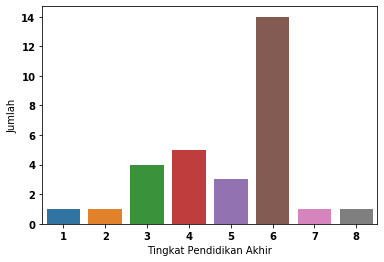

In [636]:
import seaborn as sns
sns.countplot(data['TPA']).set(xlabel='Tingkat Pendidikan Akhir', ylabel='Jumlah')
data['TPA'].value_counts()

25    5
42    3
47    3
43    2
39    2
41    2
34    1
35    1
38    1
40    1
61    1
28    1
48    1
27    1
54    1
56    1
57    1
59    1
32    1
Name: Usia, dtype: int64

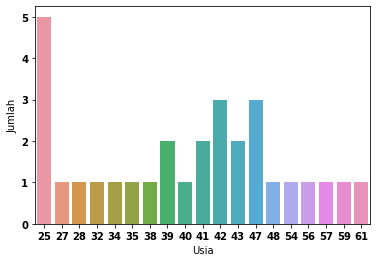

In [637]:
import seaborn as sns
sns.countplot(data['Usia']).set(xlabel='Usia', ylabel='Jumlah')
data['Usia'].value_counts()

[Text(0, 0.5, 'Jumlah'), Text(0.5, 0, 'Nilai')]

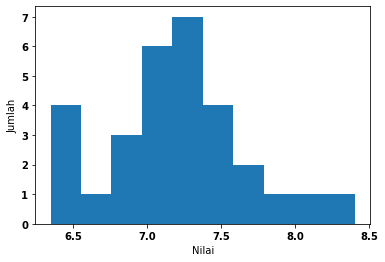

In [638]:
data['Nilai'].hist(grid=False).set(xlabel='Nilai', ylabel='Jumlah')

[Text(0, 0.5, 'Nilai'), Text(0.5, 0, 'Usia')]

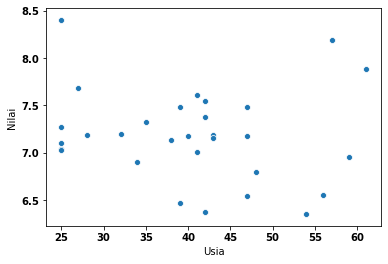

In [639]:
sns.scatterplot(x=data['Usia'],y= data['Nilai']).set(xlabel='Usia', ylabel='Nilai')

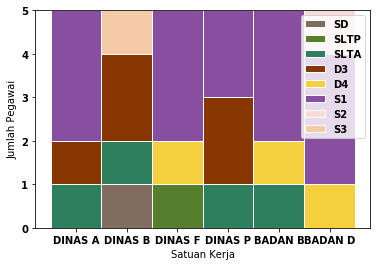

In [640]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
SD = (0, 1, 0, 0, 0, 0)
SLTP = (0, 0, 1, 0, 0, 0)
SLTA = (1, 1, 0, 1, 1, 0)
D3 = (1, 2, 0, 2, 0, 0)
D4 = (0, 0, 1, 0, 1, 1)
S1 = (3, 0, 3, 2, 3, 3)
S2 = (0, 0, 0, 0, 0, 1)
S3 = (0, 1, 0, 0, 0, 0)

# Heights of bars1 + bars2
bars2 = np.add(SD, SLTP).tolist()
bars3 = np.add(bars2, SLTA).tolist()
bars4 = np.add(bars3, D3).tolist()
bars5 = np.add(bars4, D4).tolist()
bars6 = np.add(bars5, S1).tolist()
bars7 = np.add(bars6, S2).tolist()
bars8 = np.add(bars7, S3).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['DINAS A', 'DINAS B', 'DINAS F', 'DINAS P', 'BADAN B', 'BADAN D'] 
barWidth = 1
 
# Create brown bars
plt.bar(r, SD, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, SLTP, bottom=SD, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, SLTA, bottom=bars2, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, D3, bottom=bars3, color='#873600', edgecolor='white', width=barWidth)
plt.bar(r, D4, bottom=bars4, color='#f4d03f', edgecolor='white', width=barWidth)
plt.bar(r, S1, bottom=bars5, color='#884ea0', edgecolor='white', width=barWidth)
plt.bar(r, S2, bottom=bars6, color='#fadbd8', edgecolor='white', width=barWidth)
plt.bar(r, S3, bottom=bars7, color='#f5cba7', edgecolor='white', width=barWidth)
plt.legend (('SD', 'SLTP', 'SLTA', 'D3','D4','S1','S2','S3'))

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Satuan Kerja")
plt.ylabel('Jumlah Pegawai')
 
# Show graphic
plt.show()

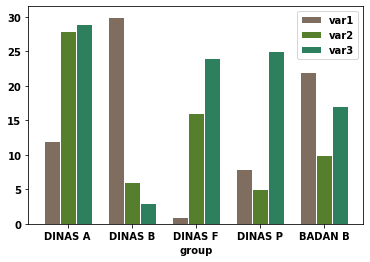

In [641]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['DINAS A', 'DINAS B', 'DINAS F', 'DINAS P', 'BADAN B', 'BADAN D'] )
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [642]:
summary = (
    data.groupby('TPA')['Nilai'].mean()
    )
data.head()

,ID,TPA,Usia,SK,Bulan,Nilai
0,1001,8,61,2,Juli,7.88436
1,1002,3,59,1,Juli,6.95183
2,1003,7,57,6,Juli,8.18452
3,1004,1,56,2,Juli,6.55612
4,1005,4,54,2,Juli,6.34694


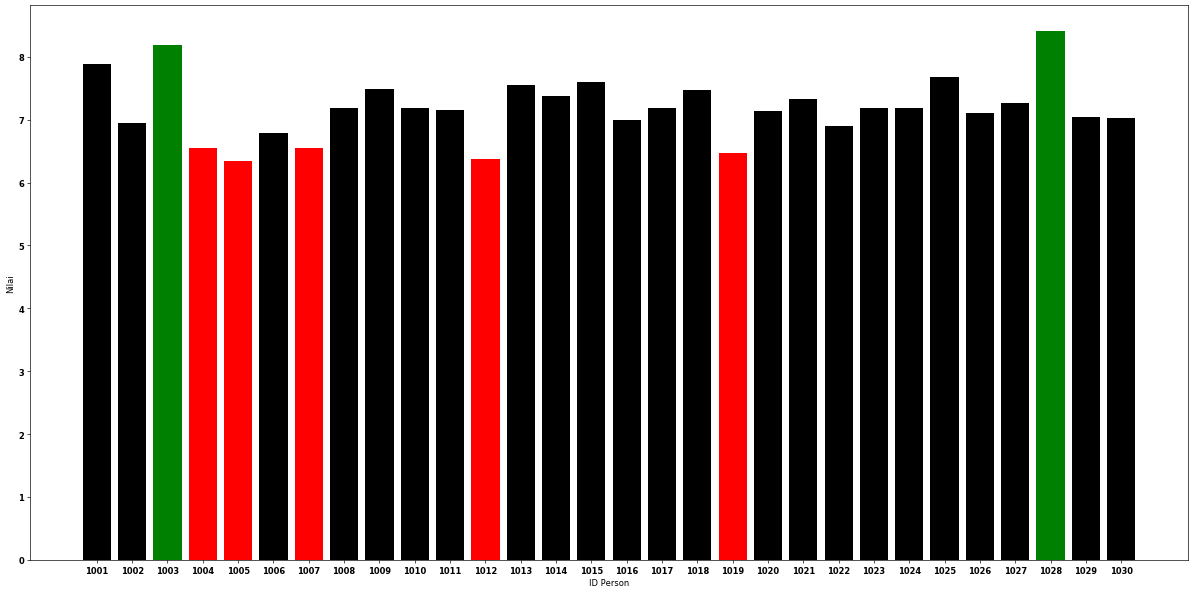

In [644]:
import matplotlib.pyplot as plt
width_in_inches = 20
height_in_inches = 10
dots_per_inch = 60

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
x = ['1001','1002','1003','1004','1005','1006','1007','1008',
     '1009','1010','1011','1012','1013','1014','1015','1016',
     '1017','1018','1019','1020','1021','1022','1023','1024',
     '1025','1026','1027','1028','1029','1030']
y = data['Nilai']

plt.xlabel("ID Person")
plt.ylabel('Nilai')

plt.bar(x, y,color=['black','black','green','red', 'red',
                    'black','red','black','black', 'black',
                    'black','red','black','black', 'black',
                    'black','black','black','red','black',
                    'black','black','black','black','black',
                    'black','black','green','black','black'])
plt.tight_layout()



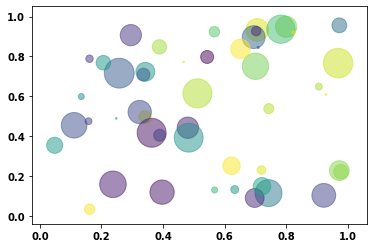

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


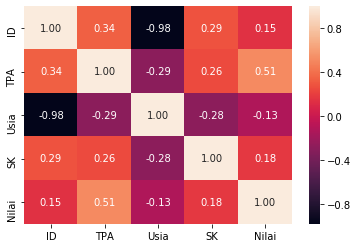

In [120]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot=True, fmt='.2f')